# Importing Libraries

In [23]:
#  Importing libraries for exploratory Data Analysis & Data Visualization

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [24]:
#  importing Data 
cars = pd.read_csv("cars.csv")

In [25]:
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [26]:
#checking data set shape
print(cars.shape)

(32, 12)


# Exloratory Data Analysis & Visualization

In [27]:
#checking for null values in data set
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

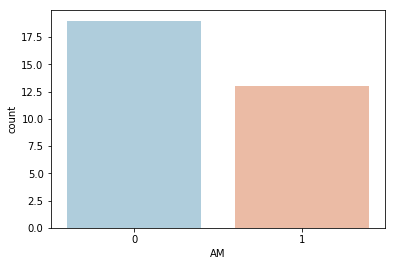

In [28]:
sb.countplot(x='AM',data=cars,palette='RdBu_r')

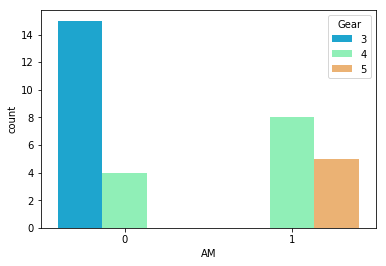

In [29]:

sb.countplot(x='AM',hue='Gear',data=cars,palette='rainbow')

# Training & Testing Split

In [30]:
#car has  Automatic(1) or Manual(0) Gear System  - AM 

# Using predictor variables/ features/ independent variabes, x1, x2, x3,... => X
y = cars.AM
X = cars.loc[:,['MPG','HP','Wt']]

In [31]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=10)

In [33]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [34]:
model_logr = LogisticRegression()

In [35]:
model_logr.fit(X_train,y_train)

C:\Users\rocky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_predict = model_logr.predict(X_test)

In [37]:
y_predict

array([1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_test

20    0
7     0
5     0
2     1
3     0
21    0
13    0
Name: AM, dtype: int64

# Model Evaluation

In [39]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
accuracy_score(y_test,y_predict)

0.8571428571428571

In [41]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.50      1.00      0.67         1

   micro avg       0.86      0.86      0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7



In [42]:
confusion_matrix(y_test,y_predict)

array([[5, 1],
       [0, 1]], dtype=int64)